<a href="https://colab.research.google.com/github/schau00/RealEstate_regression/blob/master/HackerearthMLchallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
data = pd.read_csv("train.csv")
print(data.head(5))

         Product_id  Stall_no  ... Maximum_price  Selling_Price
0  BRAE2NF6JA5GUEXG      37.0  ...        4713.0    4185.947700
1  TUNE8SFB6RJN2HSD      38.0  ...       10352.0    9271.490256
2  BRAEAR7WZPQGPBZU       9.0  ...        7309.0    6785.701362
3  WATDZ2ZQ8JPDHCTJ      50.0  ...       20814.0   13028.917824
4  JWSEBUKYQPMBZ3RK       7.0  ...        9261.0     906.553935

[5 rows x 15 columns]


In [ ]:
data.loc[np.isnan(data['Minimum_price'])]
data = data.dropna()
data = data.reset_index(drop = True)
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,WATE7VE2D62VEKW8,17.0,2016-03-28 19:55:43.000,24,Marquell,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
5393,SHOEF9G8Z4ZXF6WE,21.0,2015-02-11 15:09:26.000,55,Theodore,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
5394,PBXEB9ZQ7HHCFXYG,36.0,2015-11-19 17:29:21.000,358,Galen,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
5395,NKCEAGXHRYTNTMG7,27.0,2015-12-08 04:19:33.000,452,Posey,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


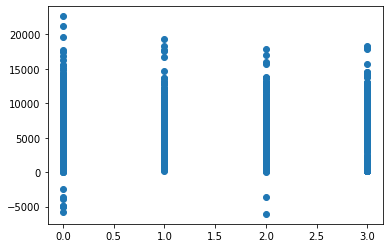

In [ ]:
plt.scatter(data['Grade'],data['Selling_Price'])

In [ ]:
X = np.array(data)
Y = X[:,-1]
X = X[:, 7:14]

In [ ]:
print(X)
print(Y)

[[1 68 0.0 ... 11.0 2983.0 4713.0]
 [0 51 0.0 ... 12.0 7495.0 10352.0]
 [0 10 0.0 ... 9.0 5752.0 7309.0]
 ...
 [3 29 0.0 ... 3.0 5303.0 14614.0]
 [0 8 0.0 ... 3.0 4334.0 5849.0]
 [0 94 0.0 ... 7.0 3975.0 5383.0]]
[4185.9477 9271.490256000001 6785.701362000001 ... 10218.878775
 5359.493997 5220.013568]


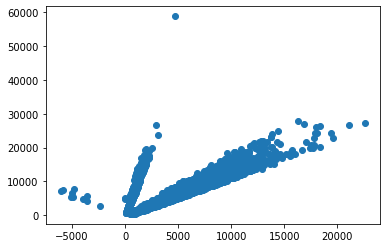

In [ ]:
plt.scatter(Y,X[:,6])

In [ ]:
for i in range(len(Y)):
  if Y[i] < 0 :
    Y[i] = (X[i,5] + X[i,6])/2

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
def cost_function(X, Y, B):
 m = len(Y)
 J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
 return J

In [ ]:
##--------------------------------------------
def batch_gradient_descent(X, Y, B, alpha, iterations):
 cost_history = [0] * iterations
 m = len(Y)
 
 for iteration in range(iterations):
 #print(iteration)
  #print(B)
 # Hypothesis Values
  h = X.dot(B)
  #print(h)
 # Difference b/w Hypothesis and Actual Y
  loss = h - Y
  #print(loss.shape)
 # Gradient Calculation
  #print(X.T.shape)
  gradient = X.T.dot(loss) / m
  #print(gradient)
 # Changing Values of B using Gradient
  B = B - alpha * gradient
 # New Cost Value
  cost = cost_function(X, Y, B)
  cost_history[iteration] = cost
 
 return B, cost_history

In [248]:
m = 5000
f = 2
X_train = X[:m,:]
X_train = np.c_[np.ones(len(X_train)),X_train]
y_train = Y[:m]
X_test = X[m:,:]
X_test = np.c_[np.ones(len(X_test)),X_test]
y_test = Y[m:]
y_train.shape

(5000,)

In [249]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])+ 1.5
alpha = 0.005
iter_ = 5000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

In [250]:
print(newB)

[4578.97524108347 31.313560938028523 -6.448365572144355
 -1592.0979019332822 118.7778343264043 5.355747500254269 976.1202594677972
 1581.8953944042894]


In [251]:
def pred (X_test,newB) :
  ypred = X_test.dot(newB)
  return ypred

In [252]:
y_pred = pred(X_test,newB)
print(y_pred)

[2751.192897038467 5256.599169008809 3638.8934979391324 7792.0091831043865
 5576.688954173382 59.38263570505717 7118.256858288483 2383.231551569579
 2292.404368134792 5454.053402139944 4121.339478234822 10436.634081158923
 2940.1093091374364 524.9788111057629 -603.7232004551199 3730.042638661762
 6090.150821359945 4839.549532002266 9182.73221046244 6896.1603439386645
 3282.279858561324 7061.889174412706 4150.565821839018 7465.002408720854
 7565.524975529184 7181.563914884135 3358.488916898419 5999.526260053781
 9283.112437964915 6363.379779544703 2649.9623999104992 3414.0109174645613
 3699.8958010602905 2535.9174133288834 3577.6677784691237
 7231.203415825339 1685.903762752237 3183.017035468454 4758.365393236405
 3915.5266212551087 8459.641558627378 5259.323253026028 -387.0216598317345
 7673.221732957989 5140.880266648852 4595.175017415583 6645.523638486125
 2991.822956062513 8120.481955326397 4804.765404076601 2811.3063746477073
 10397.260182216423 2722.74807489442 4097.657748153181 6

In [253]:
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
#----------------
r2(y_pred,y_test)

0.9558749071629957

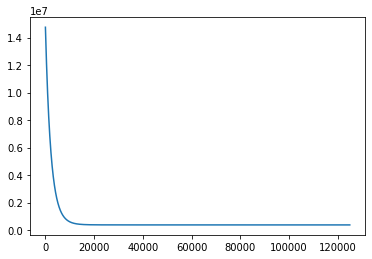

In [254]:
x_coordinate = [ 25 * i for i in range(len(cost_history)) ]
plt.plot(x_coordinate,cost_history)
plt.show()

In [255]:
from sklearn.linear_model import LinearRegression 

In [256]:
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 

0.9558804947816366


In [257]:
from google.colab import files
uploaded = files.upload()

In [309]:
td = pd.read_csv("test.csv")
print(td.head(5))
td

         Product_id  Stall_no  ... Minimum_price  Maximum_price
0  SCHE4YSTDVPVZVXW      39.0  ...        2576.0           3340
1  ACCEGCATKHNRXUHW      49.0  ...        1202.0           1955
2  NKCE6GJ5XVJDXNNZ       1.0  ...        7175.0          15715
3  NKCEB8BK3ZXDHDHM       8.0  ...        5404.0          13078
4  TOPEFDXSAHRNPF94      33.0  ...        4069.0           6244

[5 rows x 14 columns]


,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0,117.0,5.0,3094.0,4674
3426,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0,509.0,6.0,3384.0,14105
3427,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0,150.0,17.0,710.0,10894
3428,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0,325.0,15.0,1477.0,5165


In [310]:
tdX = np.array(td)
print(tdX)

[['SCHE4YSTDVPVZVXW' 39.0 '2016-01-13 07:45:08.000' ... 16.0 2576.0 3340]
 ['ACCEGCATKHNRXUHW' 49.0 '2015-08-23 20:37:05.000' ... 16.0 1202.0 1955]
 ['NKCE6GJ5XVJDXNNZ' 1.0 '2015-11-14 18:12:39.000' ... 9.0 7175.0 15715]
 ...
 ['TUNE8FWQBS7TVVT7' 14.0 '2016-03-28 20:55:47.000' ... 17.0 710.0 10894]
 ['NKCEGMUABCRGUZPE' 1.0 '2015-05-23 07:41:36.000' ... 15.0 1477.0 5165]
 ['RNGE7M92KAQWUBCS' 3.0 '2015-08-16 22:19:46.000' ... 9.0 5538.0 7506]]


In [311]:
tdX = tdX[:, 7:14]
print(tdX)
sc = StandardScaler()
tdX = sc.fit_transform(tdX)

[[0 90 0 ... 16.0 2576.0 3340]
 [0 87 0 ... 16.0 1202.0 1955]
 [2 55 0 ... 9.0 7175.0 15715]
 ...
 [0 36 0 ... 17.0 710.0 10894]
 [0 63 0 ... 15.0 1477.0 5165]
 [0 92 1 ... 9.0 5538.0 7506]]


In [312]:
tdX = np.c_[np.ones(len(tdX)),tdX]
tdY = pred(tdX,newB)

In [349]:
print(tdY)

[3655.2429120357606 2439.711649623965 11357.437249867926 ...
 5956.560937921883 3922.8549803349374 2168.1631478533554]


In [350]:
tdf = pd.DataFrame(data = td['Product_id']) 

In [351]:
tdf['Selling_Price'] = tdY
tdf

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3655.24
1,ACCEGCATKHNRXUHW,2439.71
2,NKCE6GJ5XVJDXNNZ,11357.4
3,NKCEB8BK3ZXDHDHM,9248.77
4,TOPEFDXSAHRNPF94,5800.63
...,...,...
3425,BBAE9K7BXFUTDNBK,4225.88
3426,RTRDYPA4PJHCJCGF,8996.06
3427,TUNE8FWQBS7TVVT7,5956.56
3428,NKCEGMUABCRGUZPE,3922.85


In [352]:
from google.colab import files
tdf.to_csv("submission3.csv") 
files.download("submission3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [338]:
def MAXMIN(td) :
  MAXP = 0
  MINP = 9999999
  cM = 0
  cm = 0
  maxparr = np.array(td['Maximum_price'])
  minparr = np.array(td['Minimum_price'])
  for i in range(len(maxparr)):
    if maxparr[i] > MAXP and np.isnan(maxparr[i]) == 0:
      cM = cM + 1
      MAXP += maxparr[i]
    if minparr[i] < MINP and np.isnan(minparr[i]) == 0:
      cm = cm + 1
      MINP += minparr[i]
  return MAXP/cM ,MINP/cm    

In [339]:
avmax,avmin = MAXMIN(td)

In [334]:
avmax

27954

In [335]:
avmin

124.0

In [348]:
av = (avmax+avmin)/2
for i in range(len(tdY)):
  if np.isnan(tdY[i]) :
    tdY[i] = av
  if tdY[i] < 0 :
    tdY[i] = av  